## Solving Ordinary Differential Equations Numerically

**Nick Kern**
<br>
**Astro 9: Python Programming in Astronomy**
<br>
**UC Berkeley**

Reading: Chp. 8, Computational Physics w/ Python, Newman

In this lecture, we are going to be talking about how to apply the concepts we've been building with numerical integration and differentiation to solving *ordinary differential equations*. A differential equation is just an equation that relates two variables together via a derivative. For example, one of the simplest DE is the equation of motion of an object with a constant acceleration:

\begin{align}
\frac{dx}{dt} = at + v_{0}
\end{align}

which can easily be solved by-hand using separation of variables and integrating to get $x(t)$.

The general form of a first-order, ordinary differential equation looks like

\begin{align}
\frac{dx}{dt} = f(x, t),
\end{align}

in which case, the independent variable is $t$ and the dependent variable is $x$. You may have noticed if you did the first integral in your head that in order to actually solve these equations, we need to not only integrate it but also provide a boundary condition or an initial condition (the integration constant!).

Why do we care to solve an ODE numerically? In the case of our first example, we don't, really, because we can do that simply by-hand. However, there are *plenty* of equations in Astrophysics that either cannot be solved analytically, are just too tedious to be solved by-hand, or are neither but need to just be evaluated many, many times, in which case, we'd like a computer to do it for us!

One good example of an applicable (second-order) differential equation is one that describes the motion of an object subject to a Newtonian gravitational force:

\begin{align}
\vec{F} = ma = m\frac{d^{2}x}{dt^{2}} = -\frac{GMm}{r^{2}}{\hat{r}}
\end{align}

This form of equation applies not only to something like a planet orbiting a star, but also, for example, to a sattelite orbiting the Earth or to molecular dynamics. Solutions to equations of this form are generally applicable outside of just gravitational physics, and are particularly useful for determining the equation of motion of charged objects subject to an electric field because the electric force follows the same functional form.

Let's first start by discussing ways we can solve first-order ODEs.

### Euler's Method

Suppose we are given an equation of the form $\frac{dx}{dt} = f(x, t)$ and are given an initial condition of $x$ given some time $t_{1}$. **Our goal is to solve for the function $x(t)$** for all times $t$.

Using a Taylor expansion, we can write the value of $x$ at some later time as:

\begin{align}
x(t + \Delta t) &= x(t) + \Delta t\frac{dx}{dt} + \tfrac{1}{2}{\Delta t}^{2}\frac{d^{2}x}{dt^{2}} + \ldots \\
\\
&= x(t) + \Delta t\cdot f(x, t) + \mathcal{O}(\Delta t^{2})
\end{align}

If we take $\Delta t$ to be small, than the first two terms of this equation may be a good approximation to the true answer:

\begin{align}
x(t + \Delta t) \simeq x(t) + \Delta t\cdot f(x, t)
\end{align}

Note that what we have above is nothing more than just an extrapolation of a function, $x(t)$, based on its first derivative, which we call $f(x, t) = \frac{dx}{dt}$.

In order to solve for $x$ at some later time $t_{2}$, we need only divide up our timeline from $t_{1} < t < t_{2}$ into a bunch of small chunks and use the above method *at each chunk* to reach our answer of $x(t_{2})$. This is called *Euler's Method*.

**Example**

Let's use Euler's method to solve the differential equation

\begin{align}
\frac{dx}{dt} = -x^{3} + \sin(t)
\end{align}

with an initial condition of $x = 0$ when $t=0$. Find the value of $x(t = 10)$.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# define first derivative function
def f(x, t):
    return -x**3 + np.sin(t)
    

# Define bounds and step-sizes
t1 = 0
t2 = 10
N = 100
dt = float(t2-t1)/N

# Make t-points
tpoints = np.linspace(t1, t2, N+1)

# Define initial condition
x = 0

# Iterate Euler's Method to get x(t)
xpoints = []
for t in tpoints:
    # append value of x to xpoints
    xpoints.append(x)
    
    # update value using Euler's method
    x += dt * f(x, t)

In [ ]:
# figure
fig = plt.figure(figsize=(7,7))

# axes
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_xlim(-1,11)
ax.set_ylim(-1.3,1.3)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)

# plot
ax.plot(tpoints, xpoints)

You can see from our Taylor expansion argument that the error term in Euler's method scales as $\mathcal{O}(\Delta t^{2})$. This is the error induced *at each point* in our iteration. You can see that each point relies on the answer from the previous point, meaning error at each time-step is propagated all the way to our final answer, $x(t_{2}$). To get the error on our final answer, we need to sum the error term of each point:

\begin{align}
\epsilon_{t_{2}} &= \sum_{k=0}^{N-1}\tfrac{1}{2}{\Delta t}^{2}\left(\frac{d^{2}x}{dt^{2}}\right)_{t=t_{k}} = \tfrac{1}{2}\Delta t\sum\Delta t\left(\frac{df}{dt}\right)\\
\\
&\simeq \tfrac{1}{2}\Delta t\int_{t_{1}}^{t_{2}}\frac{df}{dt}dt = \boxed{\tfrac{1}{2}\Delta t\left[f(x_{t_{2}},t_{2}) - f(x_{t_{1}}, t_{1})\right]}
\end{align}

Note that in this case, the error on the final answer $x(t_{2})$ only scales as $\Delta t^{1}$, which is worse than the error we accumulate per-step from Euler's method.

### Breakout 1

1.
Put your above script into a function called `ode_solve` that takes as input the derivative function $f$, the initial condition of $x_1$ and $t_1$, the stopping time $t_2$ and the number of time steps $N$ between $t_1$ and $t_2$. Have it return the two arrays `tpoints` and `xpoints`.

2.
Use your function to solve for $x(t)$ up to $t_2 = 10$ for initial conditions of

* $x = 0,\ t_1 = 0$
* $x = 1,\ t_1 = 0$
* $x = -1,\ t_1 = 0$
* $x = 0,\ t_1 = 2$

and plot all of these curves on a single plot.

In [ ]:
# define first derivative function
def f(x, t):
    return -x**3 + np.sin(t)

# define ode solver using Euler's Method
def ode_solve(f, x1, t1, t2, N=100):
    
    # Define bounds and step-sizes
    dt = float(t2-t1)/N

    # Make t-points
    tpoints = np.linspace(t1, t2, N+1)

    # Define initial condition
    x = x1

    # Iterate Euler's Method to get x(t)
    xpoints = []
    for t in tpoints:
        # append value of x to xpoints
        xpoints.append(x)

        # update value using Euler's method
        x += dt * f(x, t)
    
    return tpoints, xpoints

In [ ]:
tpoints1, xpoints1 = ode_solve(f, 0, 0, 15, N=250)
tpoints2, xpoints2 = ode_solve(f, 1, 0, 15, N=250)
tpoints3, xpoints3 = ode_solve(f, -1, 0, 15, N=250)
tpoints4, xpoints4 = ode_solve(f, 0, 2, 15, N=250)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.grid(True)
ax.plot(tpoints1,xpoints1, color='g')
ax.plot(tpoints2,xpoints2, color='r')
ax.plot(tpoints3,xpoints3, color='b')
ax.plot(tpoints4,xpoints4, color='k')

### Second-Order Runge-Kutta

Euler's method may work well for our simple toy-model problem over a modest range of times. However, for more complex problems the poor error properties of Euler's method will prove fatal. Let's see if we can devise a more accurate algorithm for solving an ODE.

Runge-Kutta methods are a class of methods for solving ODE's. The first-order RK method is, for example, just Euler's method. Higher order methods, like second-order and fourth-order methods, are more accurate than first-order RK and are therefore of great importance.

Let's think back to our discussion of numerical derivatives. We saw two basic methods for performing a numerical derivative: the forward difference and central difference. The forward difference is similar to what we are doing in Euler's method, however, we saw that the central difference was much more accurate in estimating the derivative. The idea behind second-order Runge-Kutta is to use a central difference for the derivative, rather than the forward difference.

<img src='imgs/rk2.png' width=400px/>
<center>Figure 8.2 of Newman</center>

Mathematically, this means we invoke a Taylor expansion not around $t$, but around $t + \Delta t/2$, meaning we can get the value at $x(t+\Delta t)$ as

\begin{align}
x(t+\Delta t) = x(t + \tfrac{1}{2}\Delta t) + \tfrac{1}{2}\Delta t\left(\frac{dx}{dt}\right)_{t + \tfrac{1}{2}\Delta t} + \tfrac{1}{8}\Delta t^{2}\left(\frac{d^{2}x}{dt^{2}}\right)_{t + \tfrac{1}{2}\Delta t} + \mathcal{O}(\Delta t^{3}).
\end{align}

Similarly, we get can the value of $x(t)$ using our expansion centered at $t + \Delta t/2$ as

\begin{align}
x(t) = x(t + \tfrac{1}{2}\Delta t) - \tfrac{1}{2}\Delta t\left(\frac{dx}{dt}\right)_{t + \tfrac{1}{2}\Delta t} + \tfrac{1}{8}\Delta t^{2}\left(\frac{d^{2}x}{dt^{2}}\right)_{t + \tfrac{1}{2}\Delta t} + \mathcal{O}(\Delta t^{3}).
\end{align}

If we take the difference of these two equations, we are left with

\begin{align}
x(t+\Delta t) = x(t) + \Delta t\cdot f(x,t+\tfrac{1}{2}\Delta t) + \mathcal{O}(\Delta t^{3})
\end{align}

Notice two major things: (1) the first two terms is similar to our Euler method from before, except now the error term goes not as $\Delta t^{2}$ but as $\Delta t^{3}$ (which is why this is called "second-order" RK) and (2) the evaluation of our derivative function $f$ is no longer at $t$ but at $t + \frac{1}{2}\Delta t$, which we don't know! We can get around this by using our Euler's method from before to make the approximation $x(t + \frac{1}{2}\Delta t) = x(t) + \frac{1}{2}\Delta t\cdot f(x,t)$, and then insert that result into $f$ to complete the second-order Runge-Kutta method.

The full method can therefore be written as

\begin{align}
k_1 &= \Delta t\cdot f(x, t)\\
k_2 &= \Delta t\cdot f(x+\tfrac{1}{2}k_1, t + \tfrac{1}{2}\Delta t)\\
x(t + \Delta t) &= x(t) + k_2
\end{align}



**Example**

Let's modify our `ode_solve` function from before to incorporate the second-order Runge-Kutta method (aka, RK2). It is almost identical, with the exception of a few extra lines.

In [ ]:
# define first derivative function
def f(x, t):
    return -x**3 + np.sin(t)

# Define bounds and step-sizes
t1 = 0.0
t2 = 10.0
N = 15
dt = float(t2-t1)/N

# Make t-points
tpoints = np.linspace(t1, t2, N+1)

# Define initial condition
x = 0.0

# Iterate Euler's Method to get x(t)
xpoints = []
for t in tpoints:
    # append value of x to xpoints
    xpoints.append(x)
    
    # update value using RK2 method
    k1 = dt * f(x, t)
    k2 = dt * f(x + 0.5*k1, t + 0.5*dt)
    x += k2

In [ ]:
# plot
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(1, 1, 1)

ax.plot(tpoints, xpoints, color='steelblue')


### Fourth-Order Runge-Kutta

We can continue to expand on our previous argument of taking central differences rather than forward differences to approximate the derivatives. The more sophisticated we get, however, the more complicated the equations become. A commonly agreed upon "sweet-spot" is the *fourth-order Runge-Kutta* method. We won't go through the derivation here, which is quite complicated and follows the same logic as RK2, but will quote the result for us to use. This fourth-order Runge-Kutta method (aka. RK4) has an error term that scales as $\mathcal{O}(\Delta t^{5})$, making it two orders better than RK2. The equations look like:

\begin{align}
k_1 &= \Delta t\cdot f(x, t)\\
k_2 &= \Delta t\cdot f(x + \tfrac{1}{2}k_1, t + \tfrac{1}{2}\Delta t)\\
k_3 &= \Delta t\cdot f(x + \tfrac{1}{2}k_2, t + \tfrac{1}{2}\Delta t)\\
k_4 &= \Delta t\cdot f(x + k_3, t + \Delta t)\\
\\
x(t + \Delta t) &= \boxed{x(t) + \tfrac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)}
\end{align}

### Breakout 2

1.
Take the above script for the second-order Runge-Kutta method and modify it to use the fourth-order RK method. Put it into a function called `RK4`, similar to your `ode_solve` function, which takes the same parameters.

2.
Use your `RK4` function to solve the same differential equation from before: $f(x, t) = \frac{dx}{dt} = -x^{3} + \sin(t)$ and make a plot of it. How many steps $N$ do we need to converge to a stable answer, as compared to what we got with Euler's method?

### Differential Equations with more than one Dependent Variable

Up to now we have studied differential equations with one independent variable and one dependent variable. Often, however, problems we encounter have more than one dependent variable. We call these *simultaneous differential equations*. In this case, we have multiple dependent variables, but still only have a single independent variable. Take for example the following set of equations

\begin{align}
\frac{dx}{dt} = xy - x;\ \ \frac{dy}{dt} = y - xy + \sin^{2}(\omega t),
\end{align}

where $x$ and $y$ are the two dependent variables and $t$ is our single independent variable. We can generalize a set of simultaneous DE to the form

\begin{align}
\frac{dx}{dt} = f_{x}(x,y,t);\ \ \frac{dy}{dt} = f_{y}(x,y,t)
\end{align}

which can further be condensed using vector notation, $\boldsymbol{r} = \langle x, y\rangle;\ \boldsymbol{f} = \langle f_{x}, f_{y}\rangle$, yielding

\begin{align}
\frac{d\boldsymbol{r}}{dt} = \boldsymbol{f}(\boldsymbol{r}, t).
\end{align}

Using this notation, simultaneous differential equations take the same form as before. Euler's method for simultaneous DE, for example, can be written as

\begin{align}
\boldsymbol{r}(t + \Delta t) = \boldsymbol{r}(t) + \Delta t\cdot\boldsymbol{f}(\boldsymbol{r},t),
\end{align}

where $\boldsymbol{r}$ could hold as many dependent variables as we like: $\boldsymbol{r} = \langle x, y, z, \ldots\rangle$.

Similarly, our fourth-order Runge-Kutta equations can be written in vector form as

\begin{align}
\boldsymbol{k}_1 &= \Delta t\cdot\boldsymbol{f}(\boldsymbol{r}, t)\\
\boldsymbol{k}_2 &= \Delta t\cdot\boldsymbol{f}(\boldsymbol{r}+\tfrac{1}{2}\boldsymbol{k}_1, t+\tfrac{1}{2}\Delta t)\\
\boldsymbol{k}_3 &= \Delta t\cdot\boldsymbol{f}(\boldsymbol{r}+\tfrac{1}{2}\boldsymbol{k}_2, t+\tfrac{1}{2}\Delta t)\\
\boldsymbol{k}_4 &= \Delta t\cdot\boldsymbol{f}(\boldsymbol{r}+\boldsymbol{k}_3, t+\Delta t)\\
\\
\boldsymbol{r}(t + \Delta t) &= \boldsymbol{r}(t) + \tfrac{1}{6}\left(\boldsymbol{k}_1 + 2\boldsymbol{k}_2 + 2\boldsymbol{k}_3 + \boldsymbol{k}_4\right)
\end{align}

**Example **

Let's apply our RK4 method in vector form to our simultaneous DE listed above.

In [ ]:
## Write Function
omega = 1.0
def f(r, t):
    # break into components
    x = r[0]
    y = r[1]
    # get derivatives
    fx = x*y - x
    fy = y - x*y + np.sin(omega * t)**2
    # return vector of derivatives
    return np.array([fx, fy], dtype=np.float)

# set bounds
t1 = 0.0
t2 = 10.0
N = 100
dt = float(t2 - t1) / N

# Initialize points in time
tpoints = np.linspace(t1, t2, N+1)

# Initialize empty x and y lists
xpoints = []
ypoints = []

# set initial condition
r = np.array([1.0, 1.0])

# loop over points in time
for t in tpoints:
    # append to x & y lists
    xpoints.append( r[0] )
    ypoints.append( r[1] )
    
    # calculate RK4
    k1 = dt * f(r, t)
    k2 = dt * f(r + 0.5*k1, t + 0.5*dt)
    k3 = dt * f(r + 0.5*k2, t + 0.5*dt)
    k4 = dt * f(r + k3, t + dt)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6.0

In [ ]:
# plot
fig = plt.figure(figsize=(9,9))

# ax1
ax1 = fig.add_subplot(2, 1, 1)
ax1.grid(True)
ax1.set_ylabel('x(t)', fontsize=18)
ax1.plot(tpoints, xpoints, color='steelblue', linewidth=3)
ax.set_ylim(0.8,2.5)

# ax2
ax2 = fig.add_subplot(2, 1, 2)
ax2.grid(True)
ax2.set_xlabel('t', fontsize=20)
ax2.set_ylabel('y(t)', fontsize=18)
ax2.plot(tpoints, ypoints, color='darkorange', linewidth=3)
ax2.set_ylim(0.3,1.8)

We can also make a 3D plot using the techniques we learned in the maplotlib lecture!

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# 3d plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# axes
ax.set_xlabel('t',fontsize=15)
ax.set_ylabel('x',fontsize=15)
ax.set_zlabel('y',fontsize=15)
ax.set_xlim(0,10)
ax.set_ylim(0.8, 2.5)
ax.set_zlim(0.3, 1.8)

# plot
ax.scatter(tpoints, xpoints, ypoints, c='steelblue')

What we see from the first figure is that we now have **two solutions** $x(t)$ and $y(t)$. However, this is really still **just one solution** that spans two dependent variables. Another way to see that is to visualize the solution in a 3D space (second figure). If we rotate the solution such that we are looking at the $x-t$ plane, we recover our $x(t)$ solution, and if we rotate it such that we are looking at the $y-t$ plane, we recover our $y(t)$ solution.

### Second-Order Differential Equations

Up to now we have studied differential equations that depend only on the first derivative with respect to the independent variable. However, we already know that some of the most important equations in physics--namely the relation between an object's motion and an acceleration induced by a force: $a(t) = \frac{d^{2}x}{dt^{2}}$--involve second derivatives. Now that we have studied how to solve first-order DE, we can begin to look at how to solve second-order differential equations.

The general form for a 2nd order DE, similar to our 1st order DE, can be written as

\begin{align}
\frac{d^{2}x}{dt^{2}} = f(x, \tfrac{dx}{dt}, t),
\end{align}

which is to say that our 2nd order term can depend on the dependent and independent variables $x$ & $t$, as well as the 1st order differential $\frac{dx}{dt}$. This could look like, for example, something along the lines of

\begin{align}
\frac{d^{2}x}{dt^{2}} = \frac{1}{x}\left(\frac{dx}{dt}\right)^{2} + 2\frac{dx}{dt} - x^{3}e^{-4t}
\end{align}

The trick to solving this equation is to define a new variable for our first derivative term, and then define our second order derivative as the first derivative of that variable. In other words:

\begin{align}
\frac{dx}{dt} &= y\\
\frac{d^{2}x}{dt^{2}} &= \frac{dy}{dt} = f(x,y,t)
\end{align}

This has reduced a single second-order DE into two simultaneous first-order DEs, which we know how to solve!

### Breakout 3: Nonlinear Pendulum

The equation of motion for a point mass at the end of a massless and frictionless arm attached to a pivot can be written as

\begin{align}
\frac{d^{2}\theta}{dt^{2}} = -\frac{g}{\ell}\sin\theta
\end{align}
where $\theta$ is the angle displacement from center, $g$ is the gravitational acceleration and $\ell$ is the length of the arm. In the limit that $\theta << 1$ this can be linearized and solved exactly. In general, however, this is a nonlinear equation that cannot be solved exactly. We can, however, solve this on a computer by using the techniques we learned above.

We can start by creating a new variable `omega` such that

\begin{align}
\frac{d\theta}{dt} &= \omega\\
&\text{and}\\
\frac{d\omega}{dt} &= -\frac{g}{\ell}\sin\theta.
\end{align}

Then, use the technique we studied above for a simultaneous set of first-order differential equations to solve for the trajectory of $\theta(t)$ with the RK4 method using the starter code and the following initial parameters:

* $\ell = 0.1$ meters
* initial angular velocity is zero
* initial $\theta=\pi/3$
* $t_1 = 0$
* $t_2 = 5$
* $N \sim 200$

1.
Do the oscillations look sinusoidal?

2.
Starting with $N = 100$, evaluate your program while decreasing the value of $N$. What do you find when $N \le 40$?

3.
Now using an initial $\theta = \pi/1.01$ and $N\sim200$, do the oscillations still look sinusoidal? What is going on?

### Adaptive Step Sizes

What was the take-away from the previous breakout? It was that the accuracy of our ODE solution can be very sensitive to the resolution of our solver. If we don't have a good enough resolution, our solution will suffer considerably. One thing you may have noticed from the highly non-linear solution, was that there were certain regimes when we needed higher resolution, and other times when we didn't really need a high resolution. Can we devise an ODE solver that can *automatically* increase the resolution of our solver when we need it, and decrease the resolution when we don't need it?

This is the idea behind an *adaptive step size*, which ensures we are maintaining a pre-determined error threshold by decreasing $\Delta t$ when necesary. At the same time, it will increase $\Delta t$ (and therefore decrease the computational cost) when we don't need a high resolution to maintain a pre-determined error threshold. These correspond to times when $x(t)$ is rapidly varying and slowly varying respectively.

To do this, we need to specify an error budget, $\delta$, or how much error we are allowed to accrue per unit time. Say we set this to be an error of 0.01 per second. Over a solution from $0 < t < 10$, that would mean a total error of 0.1 on the final solution. How do we choose the right $\Delta t$ that matches our error budget? We do this by creating an estimate of our per-step extrapolation error, $\epsilon$, and compare this to $\delta$. We then adjust $\Delta t$ to give an $\epsilon\sim\delta$ and move on to the next time-step. This follows a **very similar argument** that we used to construct an estimate of our **numerical integration error**, so it may be beneficial to review that material if this is confusing.

<img src='imgs/adaptive.png' width=300px/>
<center>Figure 8.7, Newman</center>

The argument applied to the Fourth-Order Runge-Kutta method is as follows: first we make two RK4 steps one after another with step size $\Delta t$ (denoted as $h$ in figure). In doing so, we are left with an *estimate* of the value of $x$at $t + 2\Delta t$, which we shall denote as $x_1$. We then repeat the process but this time make a single step with width $2\Delta t$, such that we are again left with an estimate of $x$ at $t + 2\Delta t$, which we now denote as $x_2$. We then make the assumption that the true answer is related to our estimate plus an error term:

\begin{align}
x_{\text{true}} &= x_1 - \epsilon_1\\
x_{\text{true}} &= x_2 - \epsilon_2.
\end{align}

Now recall the error term in RK4 is fifth-order, and therefore scales as $\Delta t^5$ per-step. This means the error on $x_1$ is roughly $\epsilon_1 = 2c\Delta t^5$, where $c$ is some constant and the 2 comes from the fact that we made two steps. Likewise, the error term on $x_2$ is roughly $\epsilon_2 = c(2\Delta t)^5 = 32c\Delta t^5$. If we equate the two equations above and solve for $\epsilon = c\Delta t^5$, we find that

\begin{align}
\epsilon = c\Delta t^{5} = \tfrac{1}{30}|x_1 - x_2|
\end{align}

where $\epsilon$ is our estimated error on our prediction of $x(t+\Delta t)$. Note this is **not** the estimated error of $x(t+2\Delta t)$.

Now that we have our estimated error, $\epsilon$, what can we do with it? Recall that our goal is to choose a $\Delta t$ small enough such that we hit our error tolerance per second, $\delta$, but no smaller: we don't want to make $\Delta t$ too small, otherwise we are performing useless extra computations that will slow things down. The question now becomes, given $\epsilon$ and given $\delta$, how can we find the ideal step size $\Delta t^{\prime}$ that gives us exactly the error that corresponds to $\delta$?

To answer this, let's first state that the error accrued on such a step would be $\epsilon^{\prime} = \left|c\left(\Delta t^{\prime}\right)^5\right|$, which we can relate back to any arbitrary step size $\Delta t$ via

\begin{align}
\epsilon^{\prime} = \left|c\left(\Delta t^{\prime}\right)^5\right| = \left|c\Delta t^5\right|\left(\frac{\Delta t^{\prime}}{\Delta t}\right)^5 = \tfrac{1}{30}|x_1 - x_2|\left(\frac{\Delta t^{\prime}}{\Delta t}\right)^5.
\end{align}

Having defined a target **accuracy per unit time**, $\delta$, we can find the **target accuracy for a single time-step** as $\Delta t^{\prime}\cdot\delta$. Equating this to our expression for $\epsilon^{\prime}$ and solving for $\Delta t^{\prime}$ yields

\begin{align}
\Delta t^{\prime} = \Delta t\left(\frac{\Delta t\cdot\delta}{\epsilon}\right)^{1/4} = \Delta t\left(\frac{30\Delta t\cdot\delta}{|x_1 - x_2|}\right)^{1/4} = \Delta t\cdot\rho,
\end{align}

where $\rho$ is the ratio of the ideal time-step size over the currently adopted time-step size, which we can now use to adjust our $\Delta t$ to match a more ideal step size.

The entire method can be described as follows:

1.
Using a step size of $\Delta t$, calculate the estimated error $\epsilon$ and use $\delta$ to compare to $\epsilon^{\prime}$ and solve for $\rho$.

2.
If $\rho > 1$, then we know that our current accuracy is **better** than our target accuracy and we can accept the single step. However, we increase the value of $\Delta t$ to match $\Delta t^{\prime}$ such that future steps have accuracies closer to our target accuracy.

3.
If $\rho < 1$, then we know that the current accuracy is **worse** than the target accuracy and we cannot accept this step. In this case, we decrease $\Delta t$ to match $\Delta t^{\prime}$ and repeat the calculation.

**Caveats:**

A.
In some cases, due to random fluctuations or weird geometries (like a flat line), we will find that $x_1 \simeq x_2$, in which case our target accuracy will diverge. To circumvent this, we can place the additional criterion that $\Delta t$ can change by no more than a factor of a few from its current value.

B.
If we go through our above methodology and set $\Delta t \rightarrow \Delta t^{\prime}$ exactly, we may find that numerical errors make it such that our new $\epsilon$ is very close to $\epsilon^{\prime}$, but is a little bit above or a little bit below it. In the case of the latter we are fine and the program will continue to the next step, but in the case of the former we will need to repeat this step of the calculation entirely, which will slow us down. In order to circumvent this, we may find it prudent to instead set $\Delta t \rightarrow 0.99\cdot\Delta t^{\prime}$ anytime we are required to change the value of $\Delta t$, while at the same time still obeying the caveat from (A).


**Example: Adaptive Step Sizes for Nonlinear Pendulum**

Let's apply the methods for adaptive step sizes to our previous example of the nonlinear pendulum. In this case, we only care about error in the angle, $\theta$, not the velocity (which, if it exists, will be propagated into the angle anyways).

In [4]:
# Define derivative vector function
def f(r, t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g*np.sin(theta)/ell
    return np.array([ftheta, fomega])

# Define RK4 algorithm with error estimate
def RK4(f, r1, t1, t2, dt=1e-3, err_tol=1e-5):

    # Define initial condition
    r = r1.copy()

    # define a function for RK4 update
    def rk4_update(r, t, dt):
        # update value using RK4
        k1 = dt * f(r, t)
        k2 = dt * f(r+0.5*k1, t+0.5*dt)
        k3 = dt * f(r+0.5*k2, t+0.5*dt)
        k4 = dt * f(r+k3, t+dt)
        return r + (k1 + 2*k2 + 2*k3 + k4)/6.0
        
    # Iterate RK4 Method
    t = t1
    theta_points = []
    tpoints = []
    while t <= t2:
        
        # append value of x to xpoints
        theta_points.append(r[0])
        tpoints.append(t)

        # Enter error tolerance loop
        while True:
            ## Calculate estimated error ##
            # double step
            r1_a = rk4_update(r, t, dt)
            r1 = rk4_update(r1_a, t+dt, dt)
            # big step
            r2 = rk4_update(r, t, 2*dt)
            
            # calculate rho
            rho = (30.0*dt*err_tol/np.abs(r1[0] - r2[0]))**(1./4)

            # evaluate ideal step size
            if rho >= 1.0:
                if rho >= 2.0:
                    rho = 2.0
                break
            else:
                if rho < 0.5:
                    rho = 0.5
                dt *= 0.99*rho
                
        # update dt
        dt *= 0.99*rho
        
        # update r to the single step
        r = r1_a.copy()
        
        # update t
        t += dt
                
    theta_points = np.array(theta_points)
    tpoints = np.array(tpoints)
    return tpoints, theta_points

In [5]:
# set constants and initial conditions
ell = 0.1
g = 9.8
r1 = np.array([np.pi/1.001, 0])

# run method
tpoints, theta_points = RK4(f, r1, 0, 10, 0.1, err_tol=1e-8)

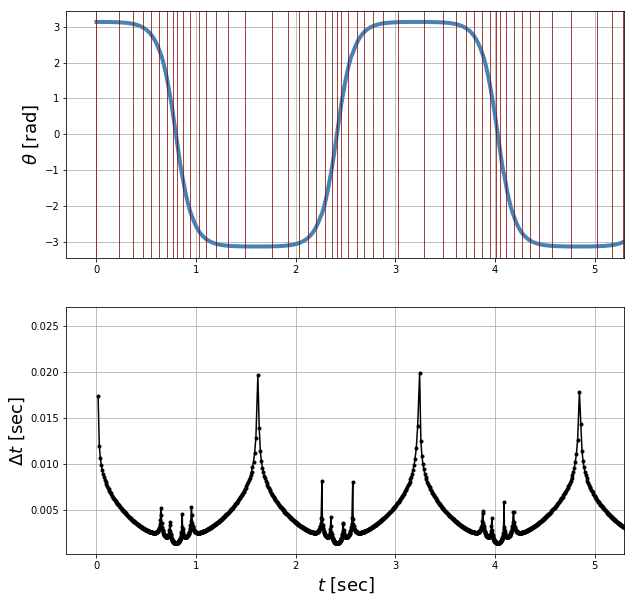

In [6]:
# plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.grid(True)
ax2.grid(True)

# ax1
ax1.plot(tpoints, theta_points, color='steelblue', linewidth=4)
ax1.set_xlim(-0.3, 5.3)
ax1.set_ylabel(r'$\theta$ [rad]', fontsize=18)
for t in tpoints[::30]:
    ax1.axvline(t, color='darkred', linewidth=1, alpha=0.75)

# ax2
ax2.plot(tpoints[1:], (tpoints[1:] - tpoints[:-1]), color='k', marker='.')
ax2.set_xlim(-.3, 5.3)
ax2.set_ylabel(r'$\Delta t$ [sec]', fontsize=18)
ax2.set_xlabel(r'$t$ [sec]', fontsize=18)

**A note about homework 4:**

Homework 4 problem 3 asks you to calculate the trajectory of a comet subject to the gravitational acceleration induced by the Sun. The last part asks you to use an adaptive step size such that an error tolerance of $\delta = 1$ km / year. This is meant to be an error tolerance not on the $x$ or $y$ displacement, but on the total displacement $r$, which equals $r = \sqrt{x^2 + y^2}$. To convert an estimated error on $x$ and $y$ into an estimated error on $r$ you can use the error propagation formula $\epsilon_r^2 = \left[\frac{x^2\epsilon_x^2}{x^2+y^2} + \frac{y^2\epsilon_y^2}{x^2+y^2}\right]$. If you'd prefer, however, you can also use the approximate simplification of $\epsilon_r^2 = \epsilon_x^2 + \epsilon_y^2$.

### Breakout 4: Trajectory with Air Resistance

Consider a spherical cannonball shot from a cannon standing level with the ground. The trajectory without air resistance can be solved by-hand and resembles a parabola, using the equations of motion:

\begin{align}
\frac{dx}{dt} &= v_{x,0}\\
\\
\frac{d^{2}y}{dt^{2}} &= -g\\
\\
\frac{dy}{dt} &= \frac{d^2y}{dt^2}t + v_{y,0}
\end{align}

If we include air resistance, this changes. The force of air resistance can be written as

\begin{align}
F = \tfrac{1}{2}\pi R^2\rho C v^2
\end{align}

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the ball's velocity and $C$ is the coefficient of drag. Incorporating these into Newton's laws gives us equations of motion given as

\begin{align}
\ddot{x} &= -\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}\\
\\
\ddot{y} &= -g - \frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{align}

where $m$ is the mass of the ball, $g$ is the gravitational acceleration and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives with respect to time.

1.
Using the techniques for second-order ODE, separate these two second-order ODEs into four first-order ODEs.

2.
Then write a script for solving the trajectory of $x(t)$ and $y(t)$ assuming $m = 1$ kg, $R = 0.08$ meters, the initial velocity is 100 meters sec$^{-1}$, the firing angle is $30^\circ$, the density of air is $\rho=1.22$kg m$^{-3}$, and the drag of a sphere has $C = 0.47$. Use an adaptive time step RK4 method to solve the ODEs, with an error tolerance **on the total displacement** of $\delta = 10^{-6}$ meters / sec.

3.
Plot the trajectory of $y(x)$. Does it look parabolic? Re-do the calculation with $C = 0.001$ and overplot that trajectory of $y(x)$ overtop. Does a sphere with air resistance travel farther or shorter than a sphere with no air resistance?

4.
Plot a series of trajectories with air resistance while varying $10^\circ < \theta < 60^\circ$. What is the launch angle that yields the farthest distance traveled along $x$?

In [57]:
def f(r, t):
    # unpack array
    x = 
    vx = 
    y =
    vy =
    # assign derivatives
    fx = 
    fvx =
    fy =
    fvy = 
    # repack
    return np.array([ , , , ], dtype=np.float)

In [54]:
# Define RK4 algorithm with error estimate
def RK4_adaptive(f, r1, t1, y2, dt=1e-3, err_tol=1e-4):

    # Define initial condition
    r = r1.copy()

    # define a function for RK4 update
    def rk4_update(r, t, dt):
        # update value using RK4
        k1 = dt * f(r, t)
        k2 = dt * f(r+0.5*k1, t+0.5*dt)
        k3 = dt * f(r+0.5*k2, t+0.5*dt)
        k4 = dt * f(r+k3, t+dt)
        return r + (k1 + 2*k2 + 2*k3 + k4)/6.0
        
    # Iterate RK4 Method
    t = 
    xpoints = 
    ypoints = 
    tpoints = 
    while  <condition> :
        
        # append value of x to xpoints
        xpoints.append()
        ypoints.append()
        tpoints.append()

        # Enter error tolerance loop
        while True:
            ## Calculate estimated error ##
            # double step
            r1_a = 
            r1 = 
            # big step
            r2 = 
            
            # calculate total error
            eps_x = 
            eps_y = 
            eps_tot = np.sqrt(eps_x**2 + eps_y**2)
            
            # calculate rho
            rho = 

            # evaluate ideal step size
            if rho >= 1.0:
                if rho >= 2.0:
                    rho = 2.0
                break
            else:
                if rho < 0.5:
                    rho = 0.5
                dt *= 0.99*rho
                
        # update dt
        dt *= 0.99*rho
        
        # update r to the single step
        r = r1_a.copy()
        
        # update t
        t += dt
        
    xpoints = np.array(xpoints)
    ypoints = np.array(ypoints)
    tpoints = np.array(tpoints)
    return tpoints, xpoints, ypoints

### plot trajectory run w/ air resistance

In [79]:
# initial conditions
g = 
m = 
R = 
C = 
RHO = 

theta0 = 
v_mag = 
vx0 = 
vy0 = 
r1 = np.array([ , , , ])

# run solver
tpoints, xpoints, ypoints = RK4_adaptive(f, r1, 0, 0, dt=1e-3, err_tol=1e-6)

In [ ]:
# plot it!





### plot trajectory w/ and w/o air resistance


In [122]:
# initial conditions
g = 
m = 
R = 
C = 
RHO = 

theta0 = 
v_mag = 
vx0 = 
vy0 = 
r1 = 

# run solver
tpoints1, xpoints1, ypoints1 = RK4_adaptive(f, r1, 0, 0, dt=1e-3, err_tol=1e-6)

# run solver
C = 
tpoints2, xpoints2, ypoints2 = RK4_adaptive(f, r1, 0, 0, dt=1e-3, err_tol=1e-10)

In [ ]:
# plot it!




### plot multiple trajectories with air resistance